# Determination of Tension Using Harmonics in the Six Strings of an Acoustic Guitar


by: **Lourenz Baliber** and **Brian Acuna**

## Theory


Theoretically, the speed of wave in a string is equal to the square root of the tension over the linear density of the string.

\begin{equation}\label{eq:1}
v = \sqrt{\frac{T}{\mu}}
\end{equation}

\noindent Where $v$ is the speed of the wave. $T$ is the tension and $\mu$ is the linear density of the string. From equation \eqref{eq:1}, we can rewrite this equation into the form $y = mx$ in order to calculate the value of T.

\begin{equation}\label{eq:2}
v^{2} = T\mu^{-1}
\end{equation}

We can also solve for the individual values of string tension for strings: Low E, A, D, G, B, and High E using,

\begin{equation}\label{eq:3}
T = v^{2}\mu
\end{equation}

In order to get the value of $v$ and $\mu$, utilizing harmonics to calculate the wavelength of the string using the scale length,

\begin{equation}\label{eq:4}
L = n\frac{\lambda}{2} \,\,\,\,\, ; \,\,\,\,\, (n = 1,2,3)
\end{equation}

where $n$ corresponds to the number of harmonics and $L$ is the wavelength. Obtaining the value of wavelength from equation \eqref{eq:4},

\begin{equation}\label{eq:5}
\lambda_{n} = \frac{2L}{n}
\end{equation}

and solving for the value of the speed of wave gives,

\begin{equation}\label{eq:6}
v = f\lambda_{n}
\end{equation}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
plt.style.use("seaborn-whitegrid")

%matplotlib inline

In [2]:
strings = np.array(["Low_E", "A", "D", "G", "B", "High_E"])
harmonics = np.array(["fundamental_freq", "snd_harmonic", "trd_harmonic"])
ld = np.array([0.006790, 0.004466, 0.002333, 0.001140, 0.000708, 0.000401])
L = 0.6477 # in meter

def fundamental(L):
    
    fund_wl = 2*L/1
    return fund_wl

def second_harmonic(L):
    
    second_h = 2*L/2
    return second_h

def third_harmonic(L):
    
    third_h = 2*L/3
    return third_h

def v(f, wl):
    
    v = f*wl
    return v

def v_squared(freq, wavelength):
    
    v_square = freq*wavelength^2
    return v_square

In [3]:
fund_wl = fundamental(L)
sh_wl = second_harmonic(L)
th_wl = third_harmonic(L)
print(f"Fundamental wavelength: {fund_wl}\nSecond harmonic wavelength: {sh_wl}\nThird harmonic wavelength: {th_wl}")

Fundamental wavelength: 1.2954
Second harmonic wavelength: 0.6477
Third harmonic wavelength: 0.4318


In [4]:
linear_density = pd.DataFrame(ld)
linear_density.index = strings
linear_density = linear_density.rename(columns = {0 : "Linear_density [kg/m]"})
linear_density["1/Linear_density"] = 1/linear_density["Linear_density [kg/m]"] 
linear_density

,Linear_density [kg/m],1/Linear_density
Low_E,0.006790,147.275405
A,0.004466,223.914017
D,0.002333,428.632662
G,0.001140,877.192982
B,0.000708,1412.429379
High_E,0.000401,2493.765586


## First trial

In [5]:
df = pd.read_excel("data.xlsx", sheet_name=0, header=None, engine='openpyxl')
df.columns = harmonics
df.index = strings
df

,fundamental_freq,snd_harmonic,trd_harmonic
Low_E,82.45,167.90,248.35
A,111.23,225.46,336.69
D,145.64,294.28,437.92
G,196.48,393.96,591.44
B,246.58,496.16,741.74
High_E,330.25,661.50,993.75


### `fundamental frequency`

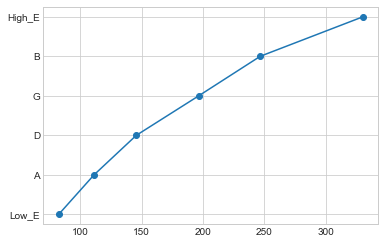

In [6]:
notes = df.index
fundamental_freq = df.fundamental_freq
snd_harmonic = df.snd_harmonic
trd_harmonic = df.trd_harmonic
plt.plot(fundamental_freq, notes, marker = 'o')
plt.savefig('1.png')

### `second harmonic`

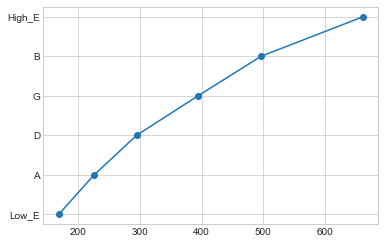

In [7]:
plt.plot(snd_harmonic, notes, marker='o')
plt.savefig('2.png')

### `third harmonic`

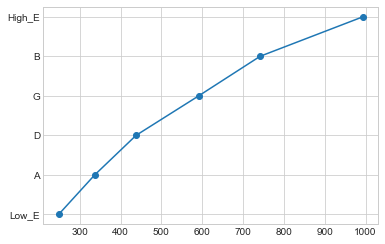

In [8]:
plt.plot(trd_harmonic, notes, marker = 'o')
plt.savefig('3.png')

In [9]:
df["velocity_ff"] = v(fundamental_freq ,fund_wl)
df["velocity_sh"] = v(snd_harmonic, sh_wl)
df["velocity_th"] = v(trd_harmonic, th_wl)
df["velocityff_squared"] = np.square(df["velocity_ff"])
df["velocitysh_squared"] = np.square(df["velocity_sh"])
df["velocityth_squared"] = np.square(df["velocity_th"])
df["linear_density_reciprocal"] = linear_density["1/Linear_density"]
df["tension_ff"] = df["velocityff_squared"]/linear_density["1/Linear_density"]
df["tension_sh"] = df["velocitysh_squared"]/linear_density["1/Linear_density"]
df["tension_th"] = df["velocityth_squared"]/linear_density["1/Linear_density"]
df

,fundamental_freq,snd_harmonic,trd_harmonic,velocity_ff,velocity_sh,velocity_th,velocityff_squared,velocitysh_squared,velocityth_squared,linear_density_reciprocal,tension_ff,tension_sh,tension_th
Low_E,82.45,167.90,248.35,106.805730,108.748830,107.237530,11407.463961,11826.308026,11499.887841,147.275405,77.456680,80.300631,78.084238
A,111.23,225.46,336.69,144.087342,146.030442,145.382742,20761.162125,21324.889991,21136.141671,223.914017,92.719350,95.236959,94.394009
D,145.64,294.28,437.92,188.662056,190.605156,189.093856,35593.371374,36330.325494,35756.486377,428.632662,83.039335,84.758649,83.419883
G,196.48,393.96,591.44,254.520192,255.167892,255.383792,64780.528136,65110.653108,65220.881216,877.192982,73.849802,74.226145,74.351805
B,246.58,496.16,741.74,319.419732,321.362832,320.283332,102028.965191,103274.069791,102581.412757,1412.429379,72.236507,73.118041,72.627640
High_E,330.25,661.50,993.75,427.805850,428.453550,429.101250,183017.845294,183572.444508,184127.882752,2493.765586,73.390156,73.612550,73.835281


In [10]:
x = linear_density["1/Linear_density"]
y1 = df["velocityff_squared"]
y2 = df["velocitysh_squared"]
y3 = df["velocityth_squared"]

def f(x, a):
    return a * x

#y1
popt, _ = curve_fit(f, x, y1)
a = popt
x_line = np.arange(min(x), max(x), 1)
y_line = f(x_line, a)

#y2
popt1, _1 = curve_fit(f, x, y2)
a1 = popt1
x_line1 = np.arange(min(x), max(x), 1)
y_line1 = f(x_line1, a1)

#y3
popt2, _2 = curve_fit(f, x, y3)
a2 = popt2
x_line2 = np.arange(min(x), max(x), 1)
y_line2 = f(x_line2, a2)


y1 = 73.48566 * x -> Fundamental Frequency
y2 = 73.91158 * x -> Second Harmonic
y3 = 73.92968 * x -> Third Harmonic


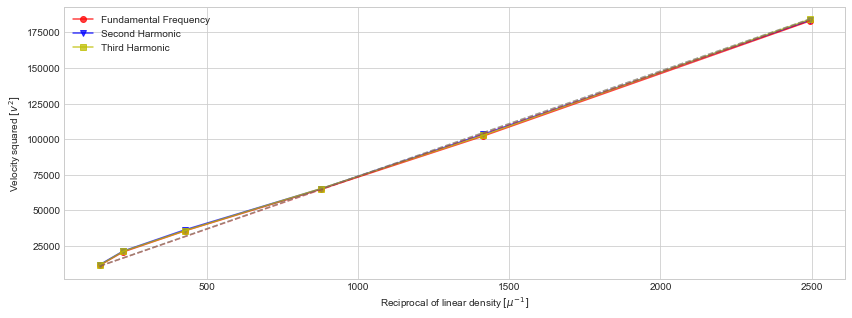

In [11]:
plt.figure(figsize=(14,5))
plt.plot(x, y1, color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(x, y2, color = 'b', label='Second Harmonic', marker = 'v', alpha=0.75)
plt.plot(x, y3, color = 'y', label='Third Harmonic', marker = 's', alpha=0.75)
plt.plot(x_line, y_line, '--', color='r',alpha=0.45)
plt.plot(x_line1, y_line1, '--', color='b',alpha=0.45)
plt.plot(x_line2, y_line2, '--', color='y',alpha=0.45)
plt.xlabel("Reciprocal of linear density $[\mu^{-1}]$")
plt.ylabel("Velocity squared $[v^{2}]$")
plt.legend(loc='best')
trial_1 = []
trial_1.append(a)
trial_1.append(a1)
trial_1.append(a2)
print("y1 = %.5f * x -> Fundamental Frequency" % a)
print("y2 = %.5f * x -> Second Harmonic" % a1)
print("y3 = %.5f * x -> Third Harmonic" % a2)
plt.savefig('4.png')

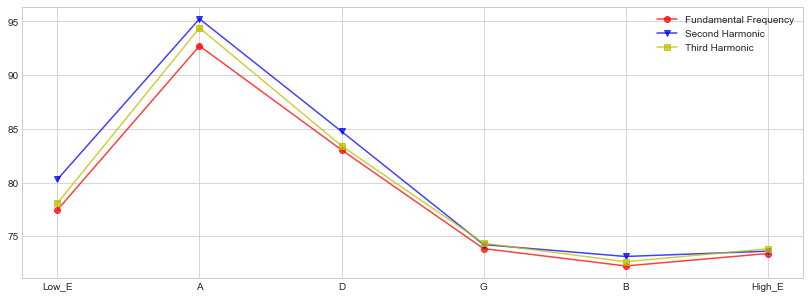

In [12]:
plt.figure(figsize=(14,5))
plt.plot(notes, df["tension_ff"], color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(notes, df["tension_sh"], color = 'b', label='Second Harmonic', marker = 'v', alpha=0.75)
plt.plot(notes, df["tension_th"], color = 'y', label='Third Harmonic', marker = 's', alpha=0.75)
plt.legend(loc='best')
plt.savefig('5.png')

In [13]:
#Creating list for string tension values

# Fundamental Frequency
Low_E_ff = []
A_ff = np.array([])
D_ff = np.array([])
G_ff = np.array([])
B_ff = np.array([])
High_E_ff = np.array([])

# Second Harmonic
Low_E_sh = np.array([])
A_sh = np.array([])
D_sh = np.array([])
G_sh = np.array([])
B_sh = np.array([])
High_E_sh = np.array([])

# Third Harmonic
Low_E_th = np.array([])
A_th = np.array([])
D_th = np.array([])
G_th = np.array([])
B_th = np.array([])
High_E_th = np.array([])

In [14]:
tension_df = pd.concat([df["tension_ff"], df["tension_sh"], df["tension_th"]], axis = 1)
tension_df = pd.DataFrame(tension_df)
tension_df

,tension_ff,tension_sh,tension_th
Low_E,77.456680,80.300631,78.084238
A,92.719350,95.236959,94.394009
D,83.039335,84.758649,83.419883
G,73.849802,74.226145,74.351805
B,72.236507,73.118041,72.627640
High_E,73.390156,73.612550,73.835281


In [15]:
Low_E_ff = np.append(Low_E_ff, tension_df.iloc[0,0])
A_ff = np.append(A_ff, tension_df.iloc[1,0])
D_ff = np.append(D_ff, tension_df.iloc[2,0])
G_ff = np.append(G_ff, tension_df.iloc[3,0])
B_ff = np.append(B_ff, tension_df.iloc[4,0])
High_E_ff = np.append(High_E_ff, tension_df.iloc[5,0])

Low_E_sh = np.append(Low_E_sh, tension_df.iloc[0,1])
A_sh = np.append(A_sh, tension_df.iloc[1,1])
D_sh = np.append(D_sh, tension_df.iloc[2,1])
G_sh = np.append(G_sh, tension_df.iloc[3,1])
B_sh = np.append(B_sh, tension_df.iloc[4,1])
High_E_sh = np.append(High_E_sh, tension_df.iloc[5,1])

Low_E_th = np.append(Low_E_th, tension_df.iloc[0,2])
A_th = np.append(A_th, tension_df.iloc[1,2])
D_th = np.append(D_th, tension_df.iloc[2,2])
G_th = np.append(G_th, tension_df.iloc[3,2])
B_th = np.append(B_th, tension_df.iloc[4,2])
High_E_th = np.append(High_E_th, tension_df.iloc[5,2])

In [16]:
Low_E_ff

array([77.45668029])

In [17]:
tension_mean = pd.DataFrame(tension_df.mean(axis = 1))
tension_mean = tension_mean.rename(columns = {0 : "Average"})
tension_mean

,Average
Low_E,78.613850
A,94.116772
D,83.739289
G,74.142584
B,72.660730
High_E,73.612662


## Second trial

In [18]:
df1 = pd.read_excel("data.xlsx", sheet_name=1, header=None, engine='openpyxl')
df1.columns = harmonics
df1.index = strings
df1

,fundamental_freq,snd_harmonic,trd_harmonic
Low_E,83.24,168.48,251.72
A,110.26,222.52,331.78
D,146.24,295.48,439.72
G,195.95,392.90,588.85
B,246.25,493.50,739.75
High_E,331.02,664.04,995.06


### `fundamental frequency`

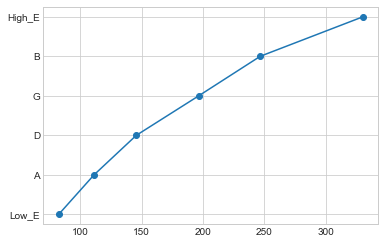

In [19]:
notes1 = df1.index
fundamental_freq1 = df1.fundamental_freq
snd_harmonic1 = df1.snd_harmonic
trd_harmonic1 = df1.trd_harmonic
plt.plot(fundamental_freq, notes, marker='o')
plt.savefig('6.png')

### `second harmonic`

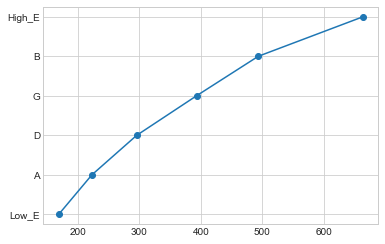

In [20]:
plt.plot(snd_harmonic1, notes, marker='o')
plt.savefig('7.png')

### `third harmonic`

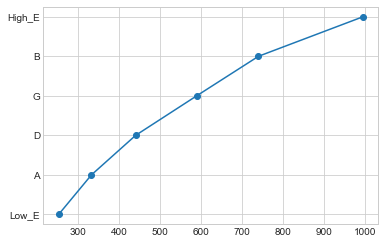

In [21]:
plt.plot(trd_harmonic1, notes, marker='o')
plt.savefig('8.png')

In [22]:
df1["velocity_ff"] = v(fundamental_freq1 ,fund_wl)
df1["velocity_sh"] = v(snd_harmonic1, sh_wl)
df1["velocity_th"] = v(trd_harmonic1, th_wl)
df1["velocityff_squared"] = np.square(df1["velocity_ff"])
df1["velocitysh_squared"] = np.square(df1["velocity_sh"])
df1["velocityth_squared"] = np.square(df1["velocity_th"])
df1["linear_density_reciprocal"] = linear_density["1/Linear_density"]
df1["tension_ff"] = df1["velocityff_squared"]/linear_density["1/Linear_density"]
df1["tension_sh"] = df1["velocitysh_squared"]/linear_density["1/Linear_density"]
df1["tension_th"] = df1["velocityth_squared"]/linear_density["1/Linear_density"]
df1

,fundamental_freq,snd_harmonic,trd_harmonic,velocity_ff,velocity_sh,velocity_th,velocityff_squared,velocitysh_squared,velocityth_squared,linear_density_reciprocal,tension_ff,tension_sh,tension_th
Low_E,83.24,168.48,251.72,107.829096,109.124496,108.692696,11627.113944,11908.155627,11814.102164,147.275405,78.948104,80.856377,80.217754
A,110.26,222.52,331.78,142.830804,144.126204,143.262604,20400.638571,20772.362679,20524.173705,223.914017,91.109252,92.769372,91.660960
D,146.24,295.48,439.72,189.439296,191.382396,189.871096,35887.246869,36627.221499,36051.033096,428.632662,83.724947,85.451308,84.107060
G,195.95,392.90,588.85,253.833630,254.481330,254.265430,64431.511719,64760.747319,64650.908893,877.192982,73.451923,73.827252,73.702036
B,246.25,493.50,739.75,318.992250,319.639950,319.424050,101756.055560,102169.697636,102031.723718,1412.429379,72.043287,72.336146,72.238460
High_E,331.02,664.04,995.06,428.803308,430.098708,429.666908,183872.276952,184984.898623,184613.651830,2493.765586,73.732783,74.178944,74.030074


In [23]:
x = linear_density["1/Linear_density"]
y1 = df1["velocityff_squared"]
y2 = df1["velocitysh_squared"]
y3 = df1["velocityth_squared"]

def f(x, a):
    return a * x

#y1
popt, _ = curve_fit(f, x, y1)
a = popt
x_line = np.arange(min(x), max(x), 1)
y_line = f(x_line, a)

#y2
popt1, _1 = curve_fit(f, x, y2)
a1 = popt1
x_line1 = np.arange(min(x), max(x), 1)
y_line1 = f(x_line1, a1)

#y3
popt2, _2 = curve_fit(f, x, y3)
a2 = popt2
x_line2 = np.arange(min(x), max(x), 1)
y_line2 = f(x_line2, a2)


y1 = 73.64983 * x -> Fundamental Frequency
y2 = 74.09246 * x -> First Harmonic
y3 = 73.92649 * x -> Second Harmonic


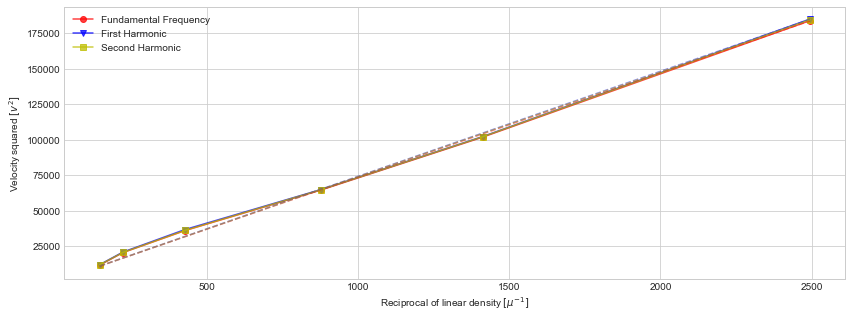

In [24]:
plt.figure(figsize=(14,5))
plt.plot(x, y1, color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(x, y2, color = 'b', label='First Harmonic', marker = 'v', alpha=0.75)
plt.plot(x, y3, color = 'y', label='Second Harmonic', marker = 's', alpha=0.75)
plt.plot(x_line, y_line, '--', color='r',alpha=0.45)
plt.plot(x_line1, y_line1, '--', color='b',alpha=0.45)
plt.plot(x_line2, y_line2, '--', color='y',alpha=0.45)
plt.xlabel("Reciprocal of linear density $[\mu^{-1}]$")
plt.ylabel("Velocity squared $[v^{2}]$")
plt.legend(loc='best')
trial_2 = []
trial_2.append(a)
trial_2.append(a1)
trial_2.append(a2)
print("y1 = %.5f * x -> Fundamental Frequency" % a)
print("y2 = %.5f * x -> First Harmonic" % a1)
print("y3 = %.5f * x -> Second Harmonic" % a2)
plt.savefig('9.png')

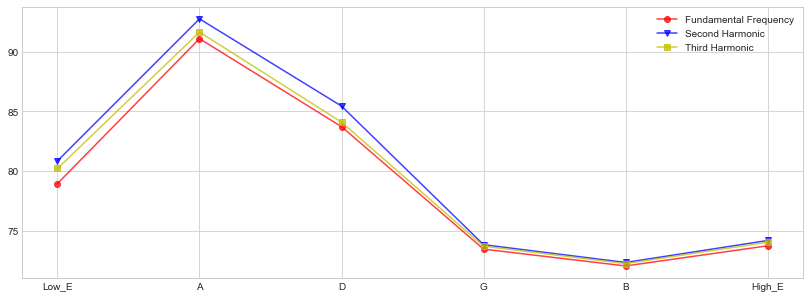

In [25]:
plt.figure(figsize=(14,5))
plt.plot(notes, df1["tension_ff"], color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(notes, df1["tension_sh"], color = 'b', label='Second Harmonic', marker = 'v', alpha=0.75)
plt.plot(notes, df1["tension_th"], color = 'y', label='Third Harmonic', marker = 's', alpha=0.75)
plt.legend(loc='best')
plt.savefig('10.png')

In [26]:
tension_df1 = pd.concat([df1["tension_ff"], df1["tension_sh"], df1["tension_th"]], axis = 1)
tension_df1 = pd.DataFrame(tension_df1)
tension_df1

,tension_ff,tension_sh,tension_th
Low_E,78.948104,80.856377,80.217754
A,91.109252,92.769372,91.660960
D,83.724947,85.451308,84.107060
G,73.451923,73.827252,73.702036
B,72.043287,72.336146,72.238460
High_E,73.732783,74.178944,74.030074


In [27]:
Low_E_ff = np.append(Low_E_ff, tension_df1.iloc[0,0])
A_ff = np.append(A_ff, tension_df1.iloc[1,0])
D_ff = np.append(D_ff, tension_df1.iloc[2,0])
G_ff = np.append(G_ff, tension_df1.iloc[3,0])
B_ff = np.append(B_ff, tension_df1.iloc[4,0])
High_E_ff = np.append(High_E_ff, tension_df1.iloc[5,0])

Low_E_sh = np.append(Low_E_sh, tension_df1.iloc[0,1])
A_sh = np.append(A_sh, tension_df1.iloc[1,1])
D_sh = np.append(D_sh, tension_df1.iloc[2,1])
G_sh = np.append(G_sh, tension_df1.iloc[3,1])
B_sh = np.append(B_sh, tension_df1.iloc[4,1])
High_E_sh = np.append(High_E_sh, tension_df1.iloc[5,1])

Low_E_th = np.append(Low_E_th, tension_df1.iloc[0,2])
A_th = np.append(A_th, tension_df1.iloc[1,2])
D_th = np.append(D_th, tension_df1.iloc[2,2])
G_th = np.append(G_th, tension_df1.iloc[3,2])
B_th = np.append(B_th, tension_df1.iloc[4,2])
High_E_th = np.append(High_E_th, tension_df1.iloc[5,2])

In [28]:
tension_mean1 = pd.DataFrame(tension_df1.mean(axis = 1))
tension_mean1 = tension_mean1.rename(columns = {0 : "Average"})
tension_mean1

,Average
Low_E,80.007411
A,91.846528
D,84.427772
G,73.660404
B,72.205965
High_E,73.980601


## Third trial

In [29]:
df2 = pd.read_excel("data.xlsx", sheet_name=2, header=None, engine='openpyxl')
df2.columns = harmonics
df2.index = strings
df2

,fundamental_freq,snd_harmonic,trd_harmonic
Low_E,82.40,165.80,250.20
A,110.87,223.74,334.61
D,146.82,296.64,443.46
G,196.31,395.62,590.93
B,249.02,500.04,750.06
High_E,327.54,657.08,985.62


### `fundamental frequency`

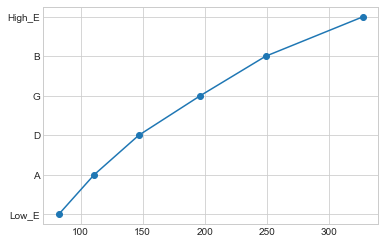

In [30]:
notes = df2.index
fundamental_freq2 = df2.fundamental_freq
snd_harmonic2 = df2.snd_harmonic
trd_harmonic2 = df2.trd_harmonic
plt.plot(fundamental_freq2, notes, marker='o')
plt.savefig('11.png')

### `second harmonic`

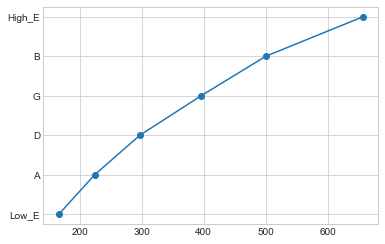

In [31]:
plt.plot(snd_harmonic2, notes, marker='o')
plt.savefig('12.png')

### `third harmonic`

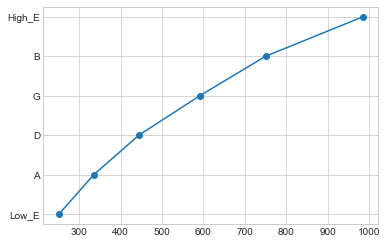

In [32]:
plt.plot(trd_harmonic2, notes, marker='o')
plt.savefig('13.png')

In [33]:
df2["velocity_ff"] = v(fundamental_freq2 ,fund_wl)
df2["velocity_sh"] = v(snd_harmonic2, sh_wl)
df2["velocity_th"] = v(trd_harmonic2, th_wl)
df2["velocityff_squared"] = np.square(df2["velocity_ff"])
df2["velocitysh_squared"] = np.square(df2["velocity_sh"])
df2["velocityth_squared"] = np.square(df2["velocity_th"])
df2["linear_density_reciprocal"] = linear_density["1/Linear_density"]
df2["tension_ff"] = df2["velocityff_squared"]/linear_density["1/Linear_density"]
df2["tension_sh"] = df2["velocitysh_squared"]/linear_density["1/Linear_density"]
df2["tension_th"] = df2["velocityth_squared"]/linear_density["1/Linear_density"]
df2

,fundamental_freq,snd_harmonic,trd_harmonic,velocity_ff,velocity_sh,velocity_th,velocityff_squared,velocitysh_squared,velocityth_squared,linear_density_reciprocal,tension_ff,tension_sh,tension_th
Low_E,82.40,165.80,250.20,106.740960,107.388660,108.036360,11393.632542,11532.324297,11671.855082,147.275405,77.362765,78.304482,79.251896
A,110.87,223.74,334.61,143.620998,144.916398,144.484598,20626.991067,21000.762409,20875.799059,223.914017,92.120142,93.789405,93.231319
D,146.82,296.64,443.46,190.190628,192.133728,191.486028,36172.474979,36915.369435,36666.898919,428.632662,84.390384,86.123557,85.543875
G,196.31,395.62,590.93,254.299974,256.243074,255.163574,64668.476776,65660.512973,65108.449496,877.192982,73.722064,74.852985,74.223632
B,249.02,500.04,750.06,322.580508,323.875908,323.875908,104058.184142,104895.603783,104895.603783,1412.429379,73.673194,74.266087,74.266087
High_E,327.54,657.08,985.62,424.295316,425.590716,425.590716,180026.515180,181127.457545,181127.457545,2493.765586,72.190633,72.632110,72.632110


In [34]:
x = linear_density["1/Linear_density"]
y1 = df2["velocityff_squared"]
y2 = df2["velocitysh_squared"]
y3 = df2["velocityth_squared"]

def f(x, a):
    return a * x

#y1
popt, _ = curve_fit(f, x, y1)
a = popt
x_line = np.arange(min(x), max(x), 1)
y_line = f(x_line, a)

#y2
popt1, _1 = curve_fit(f, x, y2)
a1 = popt1
x_line1 = np.arange(min(x), max(x), 1)
y_line1 = f(x_line1, a1)

#y3
popt2, _2 = curve_fit(f, x, y3)
a2 = popt2
x_line2 = np.arange(min(x), max(x), 1)
y_line2 = f(x_line2, a2)


y1 = 73.00121 * x -> Fundamental Frequency
y2 = 73.56633 * x -> First Harmonic
y3 = 73.50159 * x -> Second Harmonic


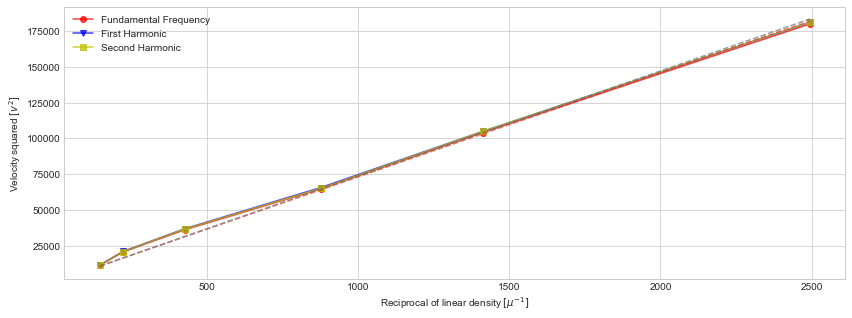

In [35]:
plt.figure(figsize=(14,5))
plt.plot(x, y1, color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(x, y2, color = 'b', label='First Harmonic', marker = 'v', alpha=0.75)
plt.plot(x, y3, color = 'y', label='Second Harmonic', marker = 's', alpha=0.75)
plt.plot(x_line, y_line, '--', color='r',alpha=0.45)
plt.plot(x_line1, y_line1, '--', color='b',alpha=0.45)
plt.plot(x_line2, y_line2, '--', color='y',alpha=0.45)
plt.xlabel("Reciprocal of linear density $[\mu^{-1}]$")
plt.ylabel("Velocity squared $[v^{2}]$")
plt.legend(loc='best')
trial_3 = []
trial_3.append(a)
trial_3.append(a1)
trial_3.append(a2)
print("y1 = %.5f * x -> Fundamental Frequency" % a)
print("y2 = %.5f * x -> First Harmonic" % a1)
print("y3 = %.5f * x -> Second Harmonic" % a2)
plt.savefig('14.png')

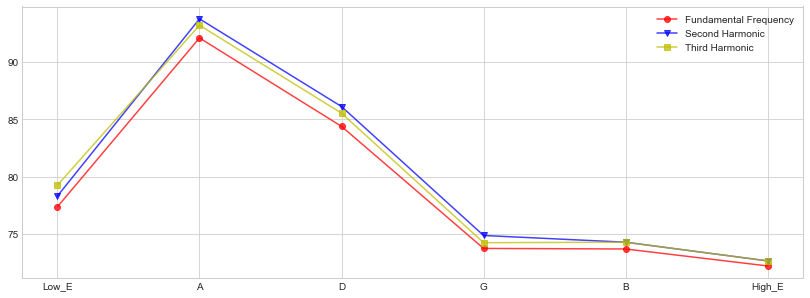

In [36]:
plt.figure(figsize=(14,5))
plt.plot(notes, df2["tension_ff"], color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(notes, df2["tension_sh"], color = 'b', label='Second Harmonic', marker = 'v', alpha=0.75)
plt.plot(notes, df2["tension_th"], color = 'y', label='Third Harmonic', marker = 's', alpha=0.75)
plt.legend(loc='best')
plt.savefig('15.png')

In [37]:
tension_df2 = pd.concat([df2["tension_ff"], df2["tension_sh"], df2["tension_th"]], axis = 1)
tension_df2 = pd.DataFrame(tension_df2)
tension_df2

,tension_ff,tension_sh,tension_th
Low_E,77.362765,78.304482,79.251896
A,92.120142,93.789405,93.231319
D,84.390384,86.123557,85.543875
G,73.722064,74.852985,74.223632
B,73.673194,74.266087,74.266087
High_E,72.190633,72.632110,72.632110


In [38]:
Low_E_ff = np.append(Low_E_ff, tension_df2.iloc[0,0])
A_ff = np.append(A_ff, tension_df2.iloc[1,0])
D_ff = np.append(D_ff, tension_df2.iloc[2,0])
G_ff = np.append(G_ff, tension_df2.iloc[3,0])
B_ff = np.append(B_ff, tension_df2.iloc[4,0])
High_E_ff = np.append(High_E_ff, tension_df2.iloc[5,0])

Low_E_sh = np.append(Low_E_sh, tension_df2.iloc[0,1])
A_sh = np.append(A_sh, tension_df2.iloc[1,1])
D_sh = np.append(D_sh, tension_df2.iloc[2,1])
G_sh = np.append(G_sh, tension_df2.iloc[3,1])
B_sh = np.append(B_sh, tension_df2.iloc[4,1])
High_E_sh = np.append(High_E_sh, tension_df2.iloc[5,1])

Low_E_th = np.append(Low_E_th, tension_df2.iloc[0,2])
A_th = np.append(A_th, tension_df2.iloc[1,2])
D_th = np.append(D_th, tension_df2.iloc[2,2])
G_th = np.append(G_th, tension_df2.iloc[3,2])
B_th = np.append(B_th, tension_df2.iloc[4,2])
High_E_th = np.append(High_E_th, tension_df2.iloc[5,2])

In [39]:
tension_mean2 = pd.DataFrame(tension_df2.mean(axis = 1))
tension_mean2 = tension_mean2.rename(columns = {0 : "Average"})
tension_mean2

,Average
Low_E,78.306381
A,93.046955
D,85.352605
G,74.266227
B,74.068456
High_E,72.484951


## Fourth trial

In [40]:
df3 = pd.read_excel("data.xlsx", sheet_name=3, header=None, engine='openpyxl')
df3.columns = harmonics
df3.index = strings
df3

,fundamental_freq,snd_harmonic,trd_harmonic
Low_E,82.75,167.50,250.25
A,110.06,222.12,333.18
D,146.80,294.60,441.40
G,195.30,392.60,587.90
B,247.45,496.90,743.35
High_E,326.94,655.88,983.82


### `fundamental frequency`

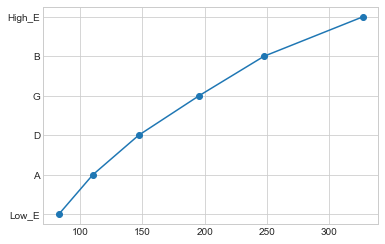

In [41]:
notes = df3.index
fundamental_freq3 = df3.fundamental_freq
snd_harmonic3 = df3.snd_harmonic
trd_harmonic3 = df3.trd_harmonic
plt.plot(fundamental_freq3, notes, marker='o')
plt.savefig('16.png')

### `second harmonic`

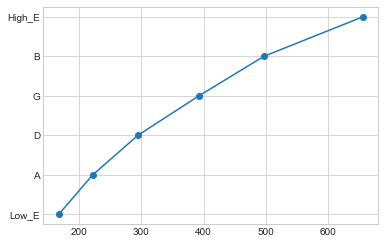

In [42]:
plt.plot(snd_harmonic3, notes, marker='o')
plt.savefig('17.png')

### `third harmonic`

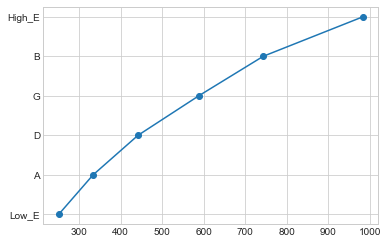

In [43]:
plt.plot(trd_harmonic3, notes, marker='o')
plt.savefig('18.png')

In [44]:
df3["velocity_ff"] = v(fundamental_freq3 ,fund_wl)
df3["velocity_sh"] = v(snd_harmonic3, sh_wl)
df3["velocity_th"] = v(trd_harmonic3, th_wl)
df3["velocityff_squared"] = np.square(df3["velocity_ff"])
df3["velocitysh_squared"] = np.square(df3["velocity_sh"])
df3["velocityth_squared"] = np.square(df3["velocity_th"])
df3["linear_density_reciprocal"] = linear_density["1/Linear_density"]
df3["tension_ff"] = df3["velocityff_squared"]/linear_density["1/Linear_density"]
df3["tension_sh"] = df3["velocitysh_squared"]/linear_density["1/Linear_density"]
df3["tension_th"] = df3["velocityth_squared"]/linear_density["1/Linear_density"]
df3

,fundamental_freq,snd_harmonic,trd_harmonic,velocity_ff,velocity_sh,velocity_th,velocityff_squared,velocitysh_squared,velocityth_squared,linear_density_reciprocal,tension_ff,tension_sh,tension_th
Low_E,82.75,167.50,250.25,107.194350,108.489750,108.057950,11490.628672,11770.025855,11676.520558,147.275405,78.021369,79.918476,79.283575
A,110.06,222.12,333.18,142.571724,143.867124,143.867124,20326.696484,20697.749368,20697.749368,223.914017,90.779026,92.436149,92.436149
D,146.80,294.60,441.40,190.164720,190.812420,190.596520,36162.620733,36409.379626,36327.033436,428.632662,84.367394,84.943083,84.750969
G,195.30,392.60,587.90,252.991620,254.287020,253.855220,64004.759790,64661.888540,64442.472721,877.192982,72.965426,73.714553,73.464419
B,247.45,496.90,743.35,320.546730,321.842130,320.978530,102750.206114,103582.356643,103027.216721,1412.429379,72.747146,73.336309,72.943269
High_E,326.94,655.88,983.82,423.518076,424.813476,424.813476,179367.560699,180466.489391,180466.489391,2493.765586,71.926392,72.367062,72.367062


In [45]:
x = linear_density["1/Linear_density"]
y1 = df3["velocityff_squared"]
y2 = df3["velocitysh_squared"]
y3 = df3["velocityth_squared"]

def f(x, a):
    return a * x

#y1
popt, _ = curve_fit(f, x, y1)
a = popt
x_line = np.arange(min(x), max(x), 1)
y_line = f(x_line, a)

#y2
popt1, _1 = curve_fit(f, x, y2)
a1 = popt1
x_line1 = np.arange(min(x), max(x), 1)
y_line1 = f(x_line1, a1)

#y3
popt2, _2 = curve_fit(f, x, y3)
a2 = popt2
x_line2 = np.arange(min(x), max(x), 1)
y_line2 = f(x_line2, a2)


y1 = 72.55418 * x -> Fundamental Frequency
y2 = 73.06531 * x -> First Harmonic
y3 = 72.95430 * x -> Second Harmonic


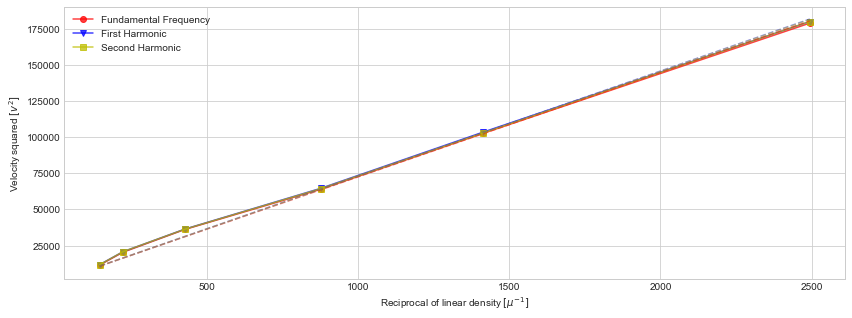

In [46]:
plt.figure(figsize=(14,5))
plt.plot(x, y1, color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(x, y2, color = 'b', label='First Harmonic', marker = 'v', alpha=0.75)
plt.plot(x, y3, color = 'y', label='Second Harmonic', marker = 's', alpha=0.75)
plt.plot(x_line, y_line, '--', color='r',alpha=0.45)
plt.plot(x_line1, y_line1, '--', color='b',alpha=0.45)
plt.plot(x_line2, y_line2, '--', color='y',alpha=0.45)
plt.xlabel("Reciprocal of linear density $[\mu^{-1}]$")
plt.ylabel("Velocity squared $[v^{2}]$")
plt.legend(loc='best')
trial_4 = []
trial_4.append(a)
trial_4.append(a1)
trial_4.append(a2)
print("y1 = %.5f * x -> Fundamental Frequency" % a)
print("y2 = %.5f * x -> First Harmonic" % a1)
print("y3 = %.5f * x -> Second Harmonic" % a2)
plt.savefig('19.png')

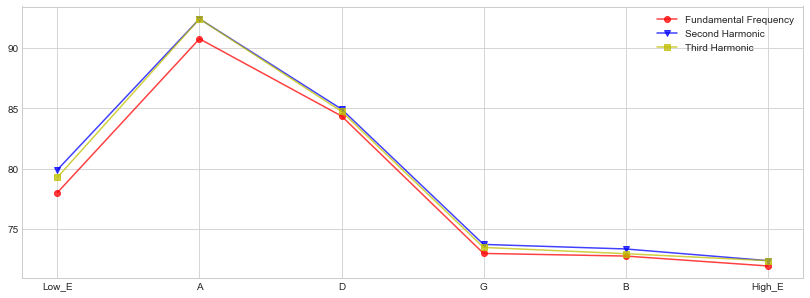

In [47]:
plt.figure(figsize=(14,5))
plt.plot(notes, df3["tension_ff"], color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(notes, df3["tension_sh"], color = 'b', label='Second Harmonic', marker = 'v', alpha=0.75)
plt.plot(notes, df3["tension_th"], color = 'y', label='Third Harmonic', marker = 's', alpha=0.75)
plt.legend(loc='best')
plt.savefig('20.png')

In [48]:
tension_df3 = pd.concat([df3["tension_ff"], df3["tension_sh"], df3["tension_th"]], axis = 1)
tension_df3 = pd.DataFrame(tension_df3)
tension_df3

,tension_ff,tension_sh,tension_th
Low_E,78.021369,79.918476,79.283575
A,90.779026,92.436149,92.436149
D,84.367394,84.943083,84.750969
G,72.965426,73.714553,73.464419
B,72.747146,73.336309,72.943269
High_E,71.926392,72.367062,72.367062


In [49]:
Low_E_ff = np.append(Low_E_ff, tension_df3.iloc[0,0])
A_ff = np.append(A_ff, tension_df3.iloc[1,0])
D_ff = np.append(D_ff, tension_df3.iloc[2,0])
G_ff = np.append(G_ff, tension_df3.iloc[3,0])
B_ff = np.append(B_ff, tension_df3.iloc[4,0])
High_E_ff = np.append(High_E_ff, tension_df3.iloc[5,0])

Low_E_sh = np.append(Low_E_sh, tension_df3.iloc[0,1])
A_sh = np.append(A_sh, tension_df3.iloc[1,1])
D_sh = np.append(D_sh, tension_df3.iloc[2,1])
G_sh = np.append(G_sh, tension_df3.iloc[3,1])
B_sh = np.append(B_sh, tension_df3.iloc[4,1])
High_E_sh = np.append(High_E_sh, tension_df3.iloc[5,1])

Low_E_th = np.append(Low_E_th, tension_df3.iloc[0,2])
A_th = np.append(A_th, tension_df3.iloc[1,2])
D_th = np.append(D_th, tension_df3.iloc[2,2])
G_th = np.append(G_th, tension_df3.iloc[3,2])
B_th = np.append(B_th, tension_df3.iloc[4,2])
High_E_th = np.append(High_E_th, tension_df3.iloc[5,2])

In [50]:
tension_mean3 = pd.DataFrame(tension_df3.mean(axis = 1))
tension_mean3 = tension_mean3.rename(columns = {0 : "Average"})
tension_mean3

,Average
Low_E,79.074473
A,91.883775
D,84.687149
G,73.381466
B,73.008908
High_E,72.220172


## Fifth trial

In [51]:
df4 = pd.read_excel("data.xlsx", sheet_name=4, header=None, engine='openpyxl')
df4.columns = harmonics
df4.index = strings
df4

,fundamental_freq,snd_harmonic,trd_harmonic
Low_E,82.40,166.80,248.20
A,110.02,221.04,333.06
D,146.21,295.42,441.63
G,196.32,393.64,591.96
B,247.40,496.80,744.20
High_E,329.63,660.26,989.89


### `fundamental frequency`

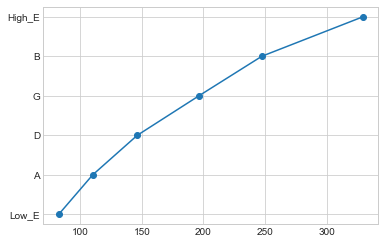

In [52]:
notes = df4.index
fundamental_freq4 = df4.fundamental_freq
snd_harmonic4 = df4.snd_harmonic
trd_harmonic4 = df4.trd_harmonic
plt.plot(fundamental_freq4, notes, marker='o')
plt.savefig('21.png')

### `second harmonic`

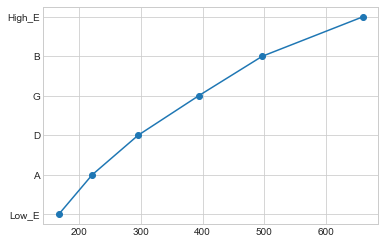

In [53]:
plt.plot(snd_harmonic4, notes, marker='o')
plt.savefig('22.png')

### `third harmonic`

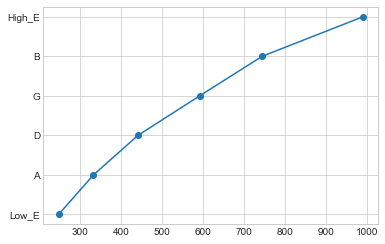

In [54]:
plt.plot(trd_harmonic4, notes, marker='o')
plt.savefig('23.png')

In [55]:
df4["velocity_ff"] = v(fundamental_freq4 ,fund_wl)
df4["velocity_sh"] = v(snd_harmonic4, sh_wl)
df4["velocity_th"] = v(trd_harmonic4, th_wl)
df4["velocityff_squared"] = np.square(df4["velocity_ff"])
df4["velocitysh_squared"] = np.square(df4["velocity_sh"])
df4["velocityth_squared"] = np.square(df4["velocity_th"])
df4["linear_density_reciprocal"] = linear_density["1/Linear_density"]
df4["tension_ff"] = df4["velocityff_squared"]/linear_density["1/Linear_density"]
df4["tension_sh"] = df4["velocitysh_squared"]/linear_density["1/Linear_density"]
df4["tension_th"] = df4["velocityth_squared"]/linear_density["1/Linear_density"]
df4

,fundamental_freq,snd_harmonic,trd_harmonic,velocity_ff,velocity_sh,velocity_th,velocityff_squared,velocitysh_squared,velocityth_squared,linear_density_reciprocal,tension_ff,tension_sh,tension_th
Low_E,82.40,166.80,248.20,106.740960,108.036360,107.172760,11393.632542,11671.855082,11486.000486,147.275405,77.362765,79.251896,77.989943
A,110.02,221.04,333.06,142.519908,143.167608,143.815308,20311.924176,20496.963980,20682.842815,223.914017,90.713053,91.539441,92.369576
D,146.21,295.42,441.63,189.400434,191.343534,190.695834,35872.524399,36612.348004,36364.901105,428.632662,83.690599,85.416608,84.839314
G,196.32,393.64,591.96,254.312928,254.960628,255.608328,64675.065348,65004.921830,65335.617343,877.192982,73.729574,74.105611,74.482604
B,247.40,496.80,744.20,320.481960,321.777360,321.345560,102708.686685,103540.669409,103262.968932,1412.429379,72.717750,73.306794,73.110182
High_E,329.63,660.26,989.89,427.002702,427.650402,427.434502,182331.307515,182884.866331,182700.253500,2493.765586,73.114854,73.336831,73.262802


In [56]:
x = linear_density["1/Linear_density"]
y1 = df4["velocityff_squared"]
y2 = df4["velocitysh_squared"]
y3 = df4["velocityth_squared"]

def f(x, a):
    return a * x

#y1
popt, _ = curve_fit(f, x, y1)
a = popt
x_line = np.arange(min(x), max(x), 1)
y_line = f(x_line, a)

#y2
popt1, _1 = curve_fit(f, x, y2)
a1 = popt1
x_line1 = np.arange(min(x), max(x), 1)
y_line1 = f(x_line1, a1)

#y3
popt2, _2 = curve_fit(f, x, y3)
a2 = popt2
x_line2 = np.arange(min(x), max(x), 1)
y_line2 = f(x_line2, a2)


y1 = 73.39609 * x -> Fundamental Frequency
y2 = 73.74726 * x -> First Harmonic
y3 = 73.67644 * x -> Second Harmonic


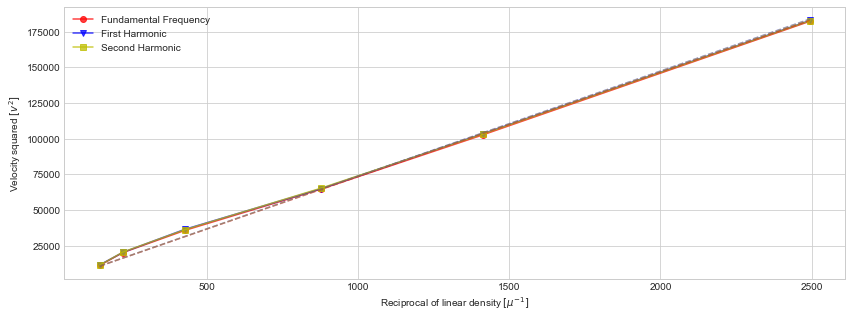

In [57]:
plt.figure(figsize=(14,5))
plt.plot(x, y1, color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(x, y2, color = 'b', label='First Harmonic', marker = 'v', alpha=0.75)
plt.plot(x, y3, color = 'y', label='Second Harmonic', marker = 's', alpha=0.75)
plt.plot(x_line, y_line, '--', color='r',alpha=0.45)
plt.plot(x_line1, y_line1, '--', color='b',alpha=0.45)
plt.plot(x_line2, y_line2, '--', color='y',alpha=0.45)
plt.xlabel("Reciprocal of linear density $[\mu^{-1}]$")
plt.ylabel("Velocity squared $[v^{2}]$")
plt.legend(loc='best')
trial_5 = []
trial_5.append(a)
trial_5.append(a1)
trial_5.append(a2)
print("y1 = %.5f * x -> Fundamental Frequency" % a)
print("y2 = %.5f * x -> First Harmonic" % a1)
print("y3 = %.5f * x -> Second Harmonic" % a2)
plt.savefig('24.png')

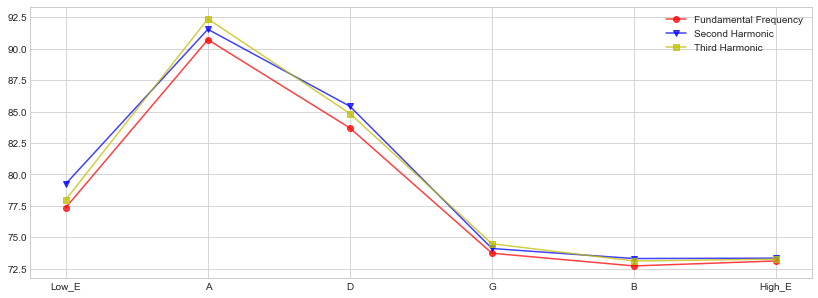

In [58]:
plt.figure(figsize=(14,5))
plt.plot(notes, df4["tension_ff"], color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(notes, df4["tension_sh"], color = 'b', label='Second Harmonic', marker = 'v', alpha=0.75)
plt.plot(notes, df4["tension_th"], color = 'y', label='Third Harmonic', marker = 's', alpha=0.75)
plt.legend(loc='best')
plt.savefig('25.png')

In [59]:
tension_df4 = pd.concat([df3["tension_ff"], df4["tension_sh"], df4["tension_th"]], axis = 1)
tension_df4 = pd.DataFrame(tension_df4)
tension_df4

,tension_ff,tension_sh,tension_th
Low_E,78.021369,79.251896,77.989943
A,90.779026,91.539441,92.369576
D,84.367394,85.416608,84.839314
G,72.965426,74.105611,74.482604
B,72.747146,73.306794,73.110182
High_E,71.926392,73.336831,73.262802


In [60]:
Low_E_ff = np.append(Low_E_ff, tension_df4.iloc[0,0])
A_ff = np.append(A_ff, tension_df4.iloc[1,0])
D_ff = np.append(D_ff, tension_df4.iloc[2,0])
G_ff = np.append(G_ff, tension_df4.iloc[3,0])
B_ff = np.append(B_ff, tension_df4.iloc[4,0])
High_E_ff = np.append(High_E_ff, tension_df4.iloc[5,0])

Low_E_sh = np.append(Low_E_sh, tension_df4.iloc[0,1])
A_sh = np.append(A_sh, tension_df4.iloc[1,1])
D_sh = np.append(D_sh, tension_df4.iloc[2,1])
G_sh = np.append(G_sh, tension_df4.iloc[3,1])
B_sh = np.append(B_sh, tension_df4.iloc[4,1])
High_E_sh = np.append(High_E_sh, tension_df4.iloc[5,1])

Low_E_th = np.append(Low_E_th, tension_df4.iloc[0,2])
A_th = np.append(A_th, tension_df4.iloc[1,2])
D_th = np.append(D_th, tension_df4.iloc[2,2])
G_th = np.append(G_th, tension_df4.iloc[3,2])
B_th = np.append(B_th, tension_df4.iloc[4,2])
High_E_th = np.append(High_E_th, tension_df4.iloc[5,2])

In [61]:
tension_mean4 = pd.DataFrame(tension_df4.mean(axis = 1))
tension_mean4 = tension_mean4.rename(columns = {0 : "Average"})
tension_mean4

,Average
Low_E,78.421069
A,91.562681
D,84.874439
G,73.851214
B,73.054707
High_E,72.842008


### String tension from Trials 1 to 5

In [62]:
final = pd.DataFrame({"Trial 1": trial_1,
                      "Trial 2": trial_2,
                      "Trial 3": trial_3,
                      "Trial 4": trial_4,
                      "Trial 5": trial_5})
final.rename(index = {0 : "Fundamental Frequency", 
                      1 : "First Harmonic",
                      2 : "Second Harmonic"}, inplace = True)
final

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
Fundamental Frequency,[73.48565802855614],[73.64982567281078],[73.00121483167212],[72.55417934929422],[73.39609158142913]
First Harmonic,[73.9115814913959],[74.09246360475034],[73.56633342576455],[73.06530975402161],[73.74726443986042]
Second Harmonic,[73.92967809399195],[73.9264874061951],[73.50158503036579],[72.95429659878894],[73.67643908758416]


In [63]:
average = final.mean(axis = 1)
average = pd.DataFrame(average)
averave = average.rename(columns = {0 : "String Tension [$N$]"}, inplace = True) 
average

,String Tension [$N$]
Fundamental Frequency,73.217394
First Harmonic,73.676591
Second Harmonic,73.597697


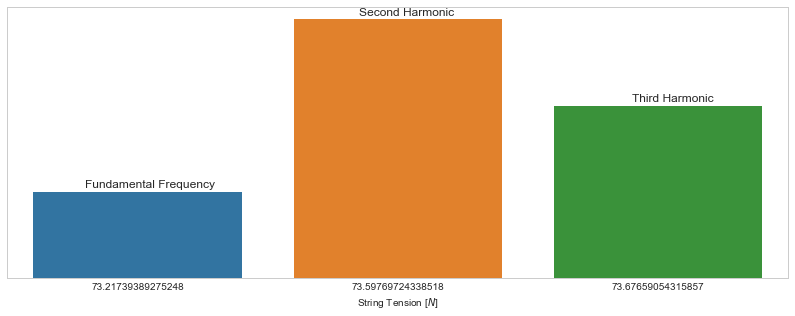

In [64]:
X = [average.iloc[0,0], average.iloc[1,0], average.iloc[2,0]]
Y = np.linspace(1,3,3)
plt.figure(figsize=(14,5))
ax = sns.barplot(x= X, y = Y)
plt.xlabel('String Tension [$N$]')
plt.yticks([])
ax.annotate('Fundamental Frequency',xy = (-0.2,1.05), fontsize = "large")
ax.annotate('Second Harmonic',xy = (0.85,3.05), fontsize = "large")
ax.annotate('Third Harmonic',xy = (1.9,2.05), fontsize = "large")
plt.savefig('average-tension-per-harmonic.png')

In [65]:
tension_meanFinal = pd.concat([tension_mean, tension_mean1, tension_mean2, tension_mean3, tension_mean4], axis = 1)
tension_meanFinal.columns = [np.arange(0,tension_meanFinal.shape[1])]
tension_meanFinal.rename(columns = {0: "Trial 1",
                                    1: "Trial 2",
                                    2: "Trial 3",
                                    3: "Trial 4",
                                    4: "Trial 5"}, inplace = True)
tension_meanFinal

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
Low_E,78.613850,80.007411,78.306381,79.074473,78.421069
A,94.116772,91.846528,93.046955,91.883775,91.562681
D,83.739289,84.427772,85.352605,84.687149,84.874439
G,74.142584,73.660404,74.266227,73.381466,73.851214
B,72.660730,72.205965,74.068456,73.008908,73.054707
High_E,73.612662,73.980601,72.484951,72.220172,72.842008


In [66]:
average_ = tension_meanFinal.mean(axis = 1)
average_ = pd.DataFrame(average_)
averave_ = average_.rename(columns = {0 : "String Tension [$N$]"}, inplace = True) 
average_

,String Tension [$N$]
Low_E,78.884637
A,92.491342
D,84.616251
G,73.860379
B,72.999753
High_E,73.028079


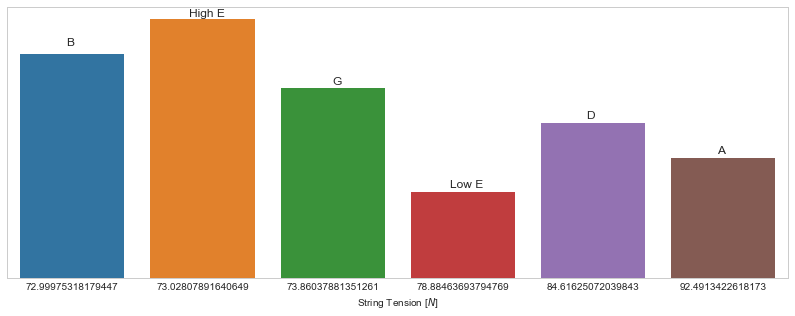

In [67]:
X_ = [average_.iloc[0,0], average_.iloc[1,0], average_.iloc[2,0], average_.iloc[3,0], average_.iloc[4,0], average_.iloc[5,0]]
Y_ = np.linspace(1,3,6)
plt.figure(figsize=(14,5))
ax_ = sns.barplot(x= X_, y = Y_)
plt.xlabel('String Tension [$N$]')
plt.yticks([])
ax_.annotate('Low E',xy = (2.9,1.05), fontsize = "large")
ax_.annotate('A',xy = (4.95,1.45), fontsize = "large")
ax_.annotate('D',xy = (3.95,1.85), fontsize = "large")
ax_.annotate('G',xy = (2,2.25), fontsize = "large")
ax_.annotate('B',xy = (-0.05,2.7), fontsize = "large")
ax_.annotate('High E',xy = (0.9,3.04), fontsize = "large")
plt.savefig('average-tension-per-string.png')

## For Fundamental Frequency

In [68]:
Low_E_ff = pd.DataFrame(Low_E_ff)
A_ff = pd.DataFrame(A_ff)
D_ff = pd.DataFrame(D_ff)
G_ff = pd.DataFrame(G_ff)
B_ff = pd.DataFrame(B_ff)
High_E_ff = pd.DataFrame(High_E_ff)
ff_final = pd.concat([Low_E_ff, A_ff, D_ff, G_ff, B_ff, High_E_ff], axis = 1)
ff_final.columns = np.arange(0,ff_final.shape[1])
ff_final.index = np.arange(0,ff_final.shape[0])
ff_final = ff_final.rename(columns = {0: "Low E",
                                      1: "A",
                                      2: "D",
                                      3: "G",
                                      4: "B",
                                      5: "High E"},
                           index = {0: "Trial 1",
                                    1: "Trial 2",
                                    2: "Trial 3",
                                    3: "Trial 4",
                                    4: "Trial 5"})
ff_final

,Low E,A,D,G,B,High E
Trial 1,77.456680,92.719350,83.039335,73.849802,72.236507,73.390156
Trial 2,78.948104,91.109252,83.724947,73.451923,72.043287,73.732783
Trial 3,77.362765,92.120142,84.390384,73.722064,73.673194,72.190633
Trial 4,78.021369,90.779026,84.367394,72.965426,72.747146,71.926392
Trial 5,78.021369,90.779026,84.367394,72.965426,72.747146,71.926392


In [69]:
average_ff = pd.DataFrame(ff_final.mean(axis = 0))
average_ff = average_ff.rename(columns = {0 : "Average"})
average_ff

,Average
Low E,77.962057
A,91.501359
D,83.977891
G,73.390928
B,72.689456
High E,72.633271


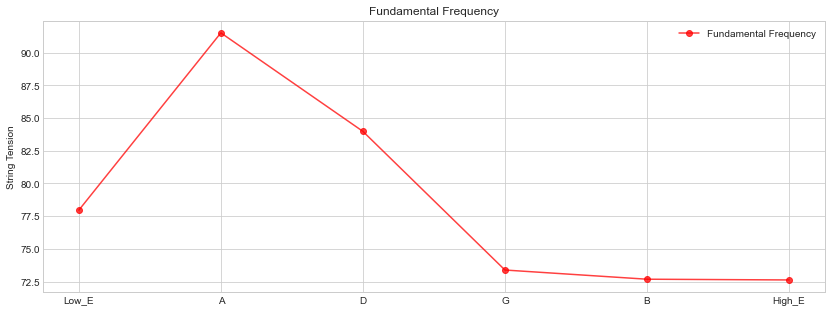

In [70]:
plt.figure(figsize=(14,5))
plt.plot(notes, average_ff, color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.title("Fundamental Frequency")
plt.ylabel("String Tension")
plt.legend(loc='best')
plt.savefig('average-tension-per-string-ff.png')

## For Second Harmonic

In [71]:
Low_E_sh = pd.DataFrame(Low_E_sh)
A_sh = pd.DataFrame(A_sh)
D_sh = pd.DataFrame(D_sh)
G_sh = pd.DataFrame(G_sh)
B_sh = pd.DataFrame(B_sh)
High_E_sh = pd.DataFrame(High_E_sh)
sh_final = pd.concat([Low_E_sh, A_sh, D_sh, G_sh, B_sh, High_E_sh], axis = 1)
sh_final.columns = np.arange(0,sh_final.shape[1])
sh_final.index = np.arange(0,sh_final.shape[0])
sh_final = sh_final.rename(columns = {0: "Low E",
                                      1: "A",
                                      2: "D",
                                      3: "G",
                                      4: "B",
                                      5: "High E"},
                           index = {0: "Trial 1",
                                    1: "Trial 2",
                                    2: "Trial 3",
                                    3: "Trial 4",
                                    4: "Trial 5"})
sh_final

,Low E,A,D,G,B,High E
Trial 1,80.300631,95.236959,84.758649,74.226145,73.118041,73.612550
Trial 2,80.856377,92.769372,85.451308,73.827252,72.336146,74.178944
Trial 3,78.304482,93.789405,86.123557,74.852985,74.266087,72.632110
Trial 4,79.918476,92.436149,84.943083,73.714553,73.336309,72.367062
Trial 5,79.251896,91.539441,85.416608,74.105611,73.306794,73.336831


In [72]:
average_sh = pd.DataFrame(sh_final.mean(axis = 0))
average_sh = average_sh.rename(columns = {0 : "Average"})
average_sh

,Average
Low E,79.726372
A,93.154265
D,85.338641
G,74.145309
B,73.272675
High E,73.225500


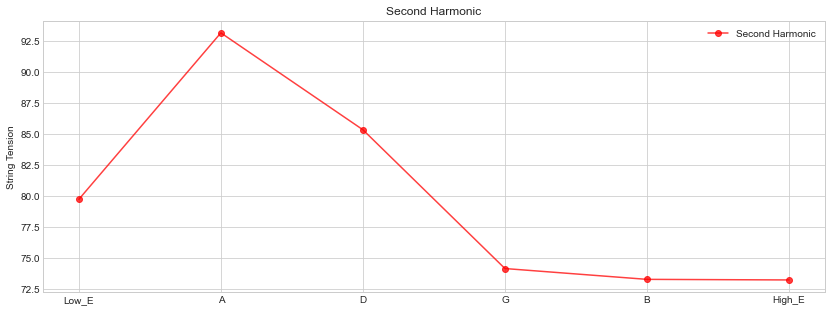

In [73]:
plt.figure(figsize=(14,5))
plt.plot(notes, average_sh, color = 'r', label='Second Harmonic', marker = 'o', alpha=0.75)
plt.title("Second Harmonic")
plt.ylabel("String Tension")
plt.legend(loc='best')
plt.savefig('average-tension-per-string-sh.png')

## For Third Harmonic

In [74]:
Low_E_th = pd.DataFrame(Low_E_th)
A_th = pd.DataFrame(A_th)
D_th = pd.DataFrame(D_th)
G_th = pd.DataFrame(G_th)
B_th = pd.DataFrame(B_th)
High_E_th = pd.DataFrame(High_E_th)
th_final = pd.concat([Low_E_th, A_th, D_th, G_th, B_th, High_E_th], axis = 1)
th_final.columns = np.arange(0,th_final.shape[1])
th_final.index = np.arange(0,th_final.shape[0])
th_final = th_final.rename(columns = {0: "Low E",
                                      1: "A",
                                      2: "D",
                                      3: "G",
                                      4: "B",
                                      5: "High E"},
                           index = {0: "Trial 1",
                                    1: "Trial 2",
                                    2: "Trial 3",
                                    3: "Trial 4",
                                    4: "Trial 5"})
th_final

,Low E,A,D,G,B,High E
Trial 1,78.084238,94.394009,83.419883,74.351805,72.627640,73.835281
Trial 2,80.217754,91.660960,84.107060,73.702036,72.238460,74.030074
Trial 3,79.251896,93.231319,85.543875,74.223632,74.266087,72.632110
Trial 4,79.283575,92.436149,84.750969,73.464419,72.943269,72.367062
Trial 5,77.989943,92.369576,84.839314,74.482604,73.110182,73.262802


In [75]:
average_th = pd.DataFrame(th_final.mean(axis = 0))
average_th = average_th.rename(columns = {0 : "Average"})
average_th

,Average
Low E,78.965481
A,92.818402
D,84.532220
G,74.044899
B,73.037128
High E,73.225466


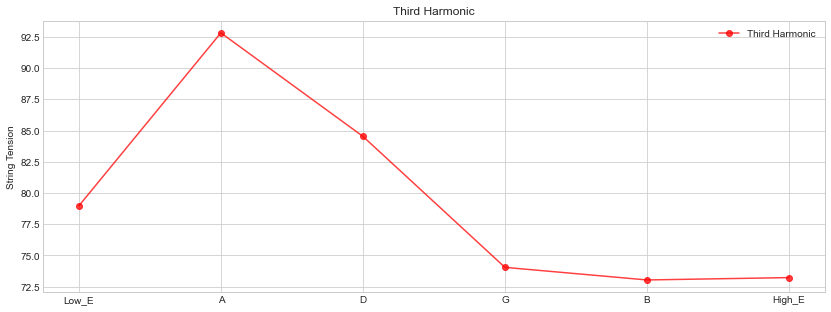

In [76]:
plt.figure(figsize=(14,5))
plt.plot(notes, average_th, color = 'r', label='Third Harmonic', marker = 'o', alpha=0.75)
plt.title("Third Harmonic")
plt.ylabel("String Tension")
plt.legend(loc='best')
plt.savefig('average-tension-per-string-th.png')

## String Tension for Fundamental Frequency, Second Harmonic, and Third Harmonic

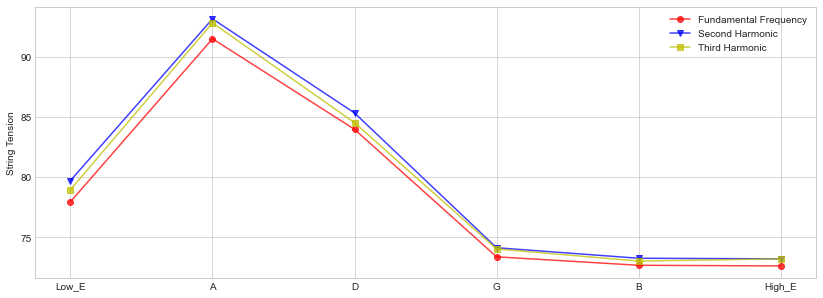

In [79]:
plt.figure(figsize=(14,5))
plt.plot(notes, average_ff, color = 'r', label='Fundamental Frequency', marker = 'o', alpha=0.75)
plt.plot(notes, average_sh, color = 'b', label='Second Harmonic', marker = 'v', alpha=0.75)
plt.plot(notes, average_th, color = 'y', label='Third Harmonic', marker = 's', alpha=0.75)
plt.ylabel("String Tension")
plt.legend(loc='best')
plt.savefig('average-tension-per-string-final.png')